In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Initilzing the CNN
cnn = Sequential()

# Step 1 - create the convolution layer
cnn.add(Convolution2D(filters = 64, 
                      kernel_size = (5, 5), 
                      activation = 'relu', 
                      input_shape = (150, 150, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Convolution2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Convolution2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

 # Step 3 - Flatten to create the input vector
cnn.add(Flatten())

# Step 4 - add the fully connected layer
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 3, activation = 'softmax', ))

In [4]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Part 2 - fitting CNN to the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = .2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .2)

In [29]:
training_set = train_datagen.flow_from_directory('./re-sorted_roof_images/',
                                                 target_size=(150, 150),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = test_datagen.flow_from_directory('./re-sorted_roof_images/',
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle = False,
                                                   subset='validation')

Found 968 images belonging to 3 classes.
Found 241 images belonging to 3 classes.


In [7]:
cnn.fit_generator(training_set,
                        steps_per_epoch= len(training_set),
                        epochs=150,
                        validation_data=validation_set,
                        validation_steps = len(validation_set),
                        callbacks = [EarlyStopping(monitor='val_loss', 
                                     patience=30, 
                                     mode='auto', 
                                     restore_best_weights=True)]
                        )

Epoch 1/150
31/31 [==============================] - 40s 1s/step - loss: 0.5853 - acc: 0.6902 - val_loss: 0.5209 - val_acc: 0.7109
Epoch 2/150
31/31 [==============================] - 40s 1s/step - loss: 0.5044 - acc: 0.7191 - val_loss: 0.5132 - val_acc: 0.7289
Epoch 3/150
31/31 [==============================] - 39s 1s/step - loss: 0.5007 - acc: 0.7214 - val_loss: 0.5120 - val_acc: 0.7234
Epoch 4/150
31/31 [==============================] - 39s 1s/step - loss: 0.4909 - acc: 0.7255 - val_loss: 0.6492 - val_acc: 0.6584
Epoch 5/150
31/31 [==============================] - 40s 1s/step - loss: 0.5108 - acc: 0.7161 - val_loss: 0.5128 - val_acc: 0.7303
Epoch 6/150
31/31 [==============================] - 41s 1s/step - loss: 0.4874 - acc: 0.7314 - val_loss: 0.5173 - val_acc: 0.7123
Epoch 7/150
31/31 [==============================] - 39s 1s/step - loss: 0.4874 - acc: 0.7269 - val_loss: 0.5042 - val_acc: 0.7234
Epoch 8/150
31/31 [==============================] - 39s 1s/step - loss: 0.4732 - a

31/31 [==============================] - 42s 1s/step - loss: 0.3451 - acc: 0.8485 - val_loss: 0.4459 - val_acc: 0.7704
Epoch 64/150
31/31 [==============================] - 41s 1s/step - loss: 0.3456 - acc: 0.8384 - val_loss: 0.4322 - val_acc: 0.7953
Epoch 65/150
31/31 [==============================] - 40s 1s/step - loss: 0.3454 - acc: 0.8478 - val_loss: 0.4273 - val_acc: 0.7981
Epoch 66/150
31/31 [==============================] - 42s 1s/step - loss: 0.3277 - acc: 0.8565 - val_loss: 0.4474 - val_acc: 0.8008
Epoch 67/150
31/31 [==============================] - 40s 1s/step - loss: 0.3616 - acc: 0.8351 - val_loss: 0.4357 - val_acc: 0.8077
Epoch 68/150
31/31 [==============================] - 40s 1s/step - loss: 0.3425 - acc: 0.8450 - val_loss: 0.4210 - val_acc: 0.8036
Epoch 69/150
31/31 [==============================] - 42s 1s/step - loss: 0.3216 - acc: 0.8519 - val_loss: 0.4300 - val_acc: 0.7828
Epoch 70/150
31/31 [==============================] - 41s 1s/step - loss: 0.3104 - acc: 0

In [101]:
#cnn.save('./pickled_models/categorical_model.h5')

In [25]:
from keras.models import load_model

In [26]:
n_cnn = load_model('./pickled_models/categorical_model.h5')

In [35]:
y = validation_set.classes

In [30]:
y_pred = np.argmax(n_cnn.predict_generator(validation_set, len(validation_set)), axis=1)

In [36]:
cm = confusion_matrix(validation_set.classes, y_pred)
cm

array([[  6,   3,   7],
       [  3, 101,  30],
       [  2,  23,  66]])

In [39]:
print('Model Accuracy:')
print(round(accuracy_score(y, y_pred), 4))
print()
print('Confusion Matrix:')
print(confusion_matrix(validation_set.classes, y_pred))
print()
target_names = ['None', 'Good', 'Poor']
print('Classification Report:')
print(classification_report(validation_set.classes, y_pred, target_names=target_names))

Model Accuracy:
0.7178

Confusion Matrix:
[[  6   3   7]
 [  3 101  30]
 [  2  23  66]]

Classification Report:
             precision    recall  f1-score   support

       None       0.55      0.38      0.44        16
       Good       0.80      0.75      0.77       134
       Poor       0.64      0.73      0.68        91

avg / total       0.72      0.72      0.72       241



In [416]:
oid_filters = []

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        oid_filters.append(validation_set.filenames[i].split('_')[1].split('.')[0])

In [418]:
import pandas as pd

In [420]:
buildings = pd.read_csv('./CHARIM_Data/Buildings/buildings_1.csv')

In [429]:
index_lst = []

for i in range(len(buildings.OID_)):
    if str(buildings.OID_[i]) in oid_filters:
        index_lst.append(i)

In [431]:
poor_buildings = buildings.iloc[index_lst, :]

In [37]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [40]:
print_cm(cm, labels=target_names)

           None  Good  Poor 
     None   6.0   3.0   7.0 
     Good   3.0 101.0  30.0 
     Poor   2.0  23.0  66.0 


In [66]:
# Plot a Confusion Matrix
# I find it helpful to see how well a classifier is doing by plotting a confusion matrix. This function produces both 'regular' and normalized confusion matrices.

import numpy as np



def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix (%)',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    plt.rcParams.update({'font.size': 20})
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(round(cm[i, j], 2)),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(round(cm[i, j], 2)),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

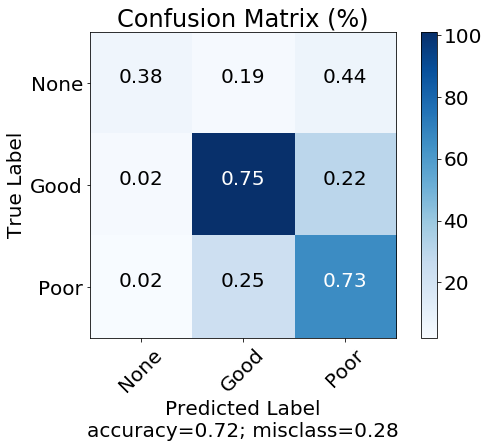

In [67]:
plot_confusion_matrix(cm, target_names, normalize=True)